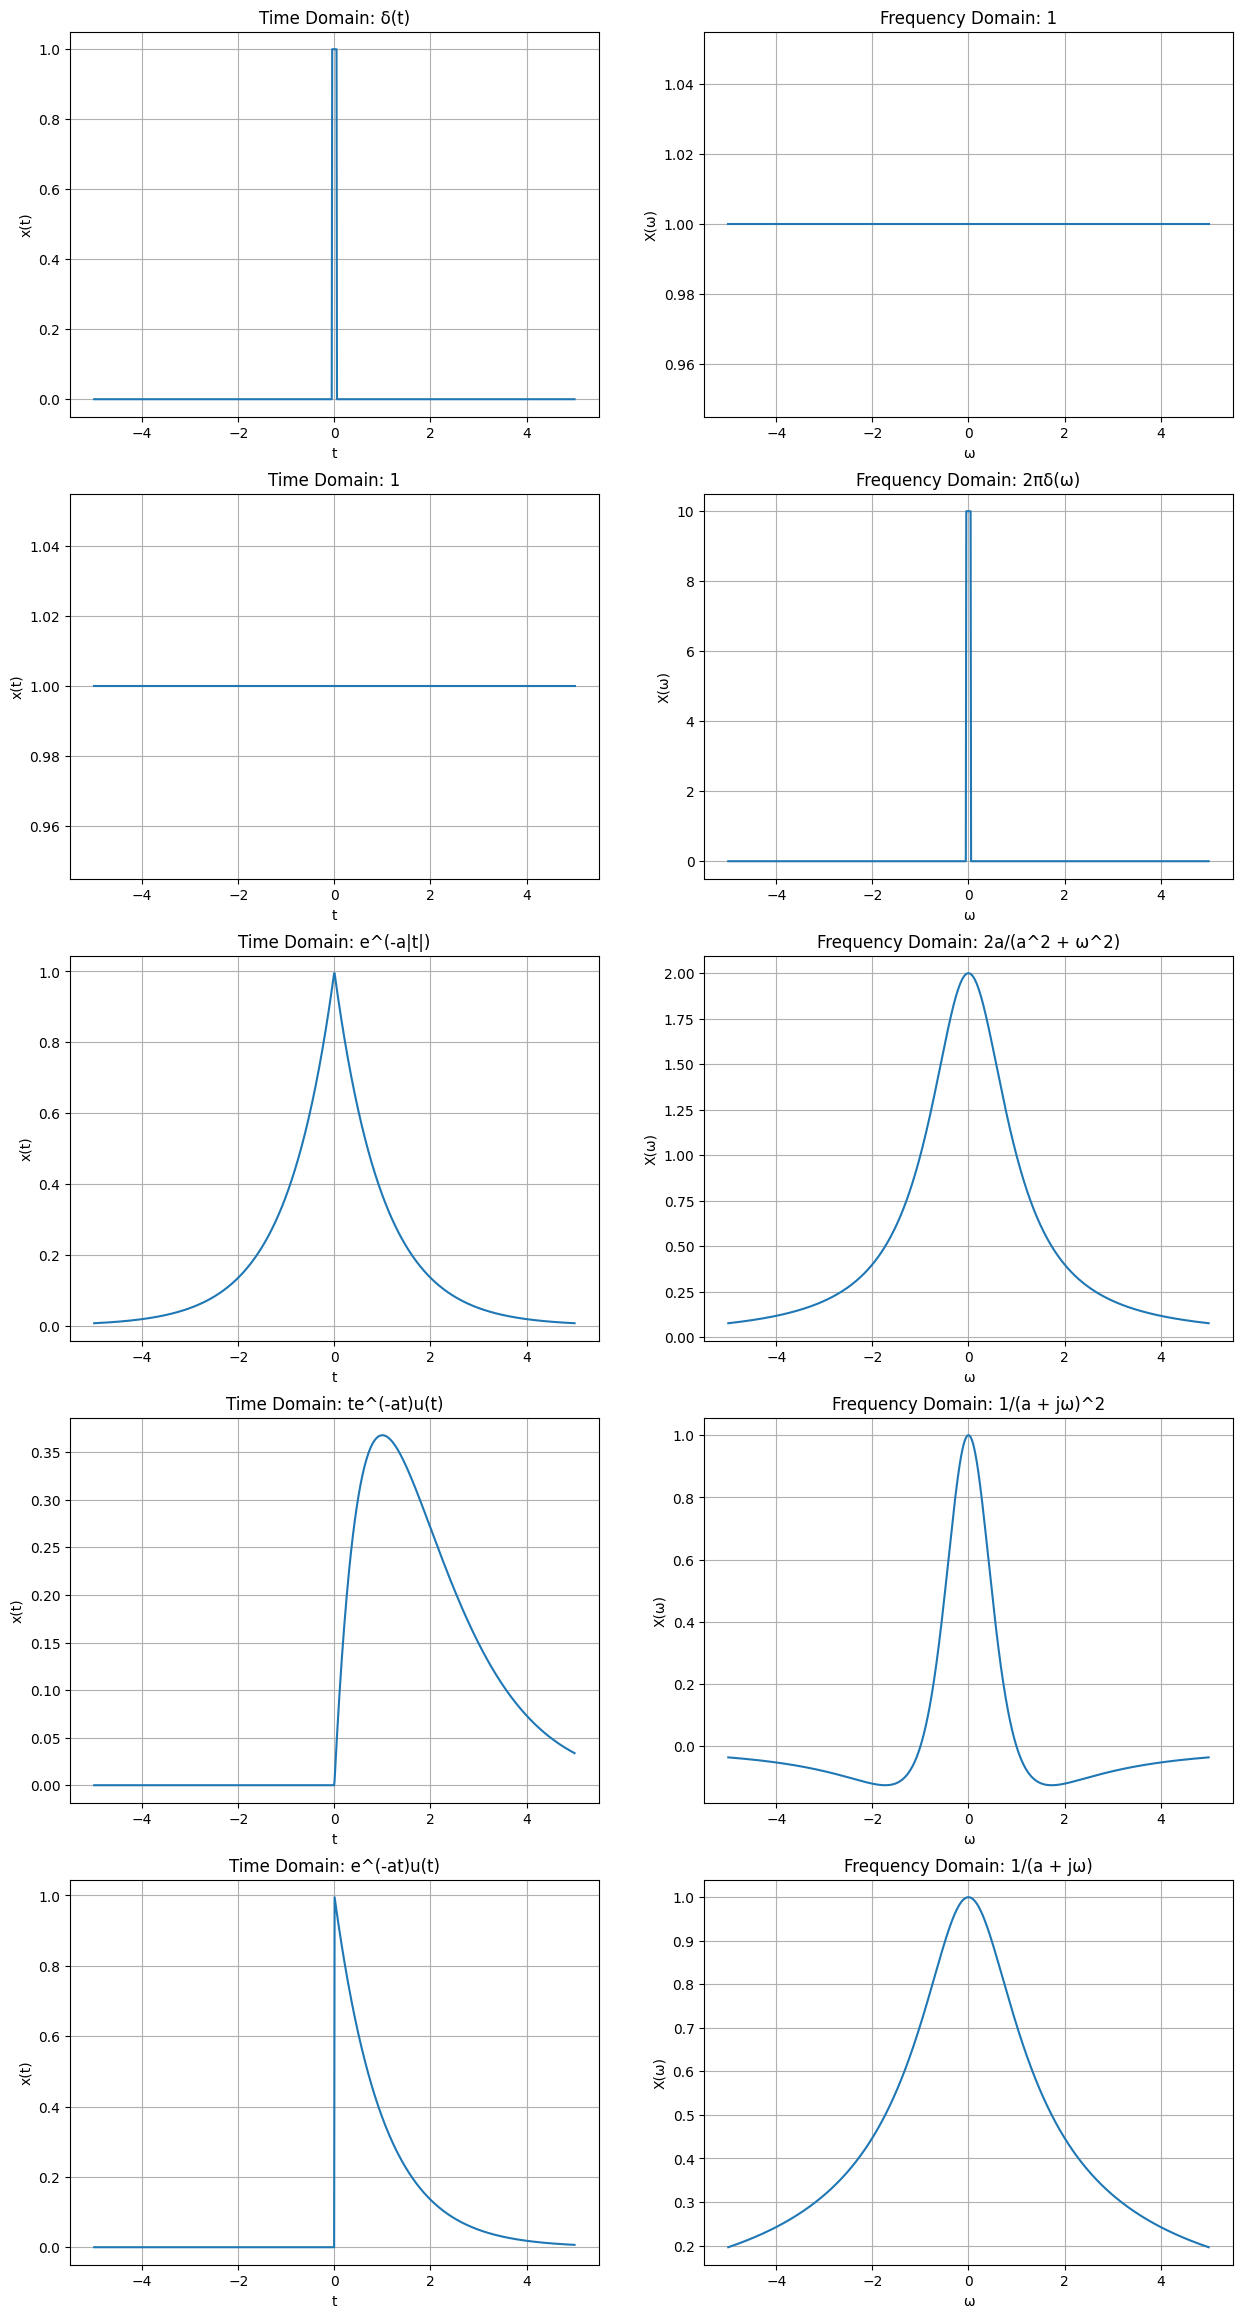

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
from sympy.abc import t, omega
from sympy import fourier_transform, inverse_fourier_transform, exp, sin, cos, pi, DiracDelta, Heaviside, symbols

# Set up the figure for plotting
plt.figure(figsize=(15,65))

# Function to plot time domain and frequency domain
def plot_fourier_pair(time_func, freq_func, time_expr, freq_expr, idx):
    # Time domain plot
    ax1 = plt.subplot(11, 2, 2*idx-1)
    t_vals = np.linspace(-5, 5, 1000)
    
    if callable(time_func):
        f_t = time_func(t_vals)
    else:
        f_t = time_func
        
    plt.plot(t_vals, f_t)
    plt.title(f"Time Domain: {time_expr}")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.grid(True)
    
    # Frequency domain plot
    ax2 = plt.subplot(11, 2, 2*idx)
    omega_vals = np.linspace(-5, 5, 1000)
    
    if callable(freq_func):
        f_omega = freq_func(omega_vals)
    else:
        f_omega = freq_func
        
    plt.plot(omega_vals, f_omega)
    plt.title(f"Frequency Domain: {freq_expr}")
    plt.xlabel("ω")
    plt.ylabel("X(ω)")
    plt.grid(True)

# 1. δ(t) ↔ 1
plot_fourier_pair(
    lambda t: np.where(np.abs(t) < 0.05, 1, 0),  # Approximation of delta function
    lambda omega: np.ones_like(omega),
    "δ(t)",
    "1",
    1
)

# 2. 1 ↔ 2πδ(ω)
plot_fourier_pair(
    lambda t: np.ones_like(t),
    lambda omega: np.where(np.abs(omega) < 0.05, 10, 0),  # Approximation of 2πδ(ω)
    "1",
    "2πδ(ω)",
    2
)

# 3. e^(-a|t|) ↔ 2a/(a^2 + ω^2)
a = 1
plot_fourier_pair(
    lambda t: np.exp(-a * np.abs(t)),
    lambda omega: 2*a/(a**2 + omega**2),
    "e^(-a|t|)",
    "2a/(a^2 + ω^2)",
    3
)

# 4. te^(-at)u(t) ↔ 1/(a + jω)^2
plot_fourier_pair(
    lambda t: t * np.exp(-a * t) * (t >= 0),
    lambda omega: 1/((a + 1j*omega)**2),  # Using magnitude for plotting
    "te^(-at)u(t)",
    "1/(a + jω)^2",
    4
)

# 5. e^(-at)u(t) ↔ 1/(a + jω)
plot_fourier_pair(
    lambda t: np.exp(-a * t) * (t >= 0),
    lambda omega: 1/np.sqrt((a)**2 + omega**2),  # Magnitude of 1/(a + jω)
    "e^(-at)u(t)",
    "1/(a + jω)",
    5
)
